In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#1.LIST: BIG PLANET LIST FROM PLANET S WITH RIGHT COLUMNS

In [3]:
#raw.rdb downloaded from DACE planetS catalog

In [4]:
table_file = '/Users/kasperer/Downloads/DACE_export/raw.rdb'
big_planet_list_all = pd.read_csv(table_file, sep='\t') 

#choose columns
columns = ['planet_name', 'period',
                   'planet_mass', 'planet_radius', 
                   'planet_mass_rel_err', 'planet_radius_rel_err',
                   'stellar_eff_temp','gaia_dr3_id', 'stellar_surface_gravity','stellar_metallicity'
                   ] #'teff_gaia_dr3'

big_planet_list = big_planet_list_all[columns]

#print(df_filtered)
#print(df) #whole list
#print(df.columns.tolist()) #list of columns

In [5]:
columns_list = list(big_planet_list_all.columns)
print(columns_list)

['planet_name', 'reference', 'period', 'planet_mass', 'planet_radius', 'planet_mass_rel_err', 'planet_radius_rel_err', 'planet_letter', 'tic_id', 'gaia_dr3_id', 'discovery_year', 'discovery_method', 'discovery_facility', 'discovery_locale', 'number_stars', 'number_planets', 'ads_link', 'last_updated', 'planet_mass_upper', 'planet_mass_lower', 'planet_msini', 'planet_msini_upper', 'planet_msini_lower', 'planet_radius_upper', 'planet_radius_lower', 'period_upper', 'period_lower', 'semi_major_axis', 'semi_major_axis_upper', 'semi_major_axis_lower', 'semi_major_axis_source', 'ecc', 'ecc_upper', 'ecc_lower', 'ecc_upper_flag', 'insolation_flux', 'insolation_flux_upper', 'insolation_flux_lower', 'equilibrium_temp', 'equilibrium_temp_upper', 'equilibrium_temp_lower', 'inclination', 'inclination_upper', 'inclination_lower', 'projected_obliquity', 'projected_obliquity_upper', 'projected_obliquity_lower', 'projected_obliquity_ref', 'epoch_periastron', 'epoch_periastron_upper', 'epoch_periastron_l

In [6]:
#count how many planets are in initial list 
df_rowcut = big_planet_list.iloc[3:] 
row_count = df_rowcut.shape[0]  

print("Number of planets in inital planetS list:", row_count)

Number of planets in inital planetS list: 765


In [7]:
#save as csv
path = '/Users/kasperer/Desktop/Thesis/big_planet_list_141024'
big_planet_list.to_csv(path, index=False)

In [8]:
#2. SMALL PLANET LIST

In [9]:
#FILTER BY THESE CRITERIA
#mass < 10 Me --> < 0.0315 Mj
#radius < 2 Re --> < 0.182 Rj
#Teff > 4000 K --> same unit

In [10]:
#big_planet_list

In [11]:
#cut the first 3 rows because they are only the headers of the columns
big_planet_list_numbers = big_planet_list.iloc[3:]

In [12]:
big_planet_list_numbers['planet_radius'] = pd.to_numeric(big_planet_list_numbers['planet_radius'])
big_planet_list_numbers['stellar_eff_temp'] = pd.to_numeric(big_planet_list_numbers['stellar_eff_temp'])
big_planet_list_numbers['planet_mass'] = pd.to_numeric(big_planet_list_numbers['planet_mass'])
big_planet_list_numbers['stellar_surface_gravity'] = pd.to_numeric(big_planet_list_numbers['stellar_surface_gravity'])
big_planet_list_numbers['stellar_metallicity'] = pd.to_numeric(big_planet_list_numbers['stellar_metallicity'])

/var/folders/2x/jt01c38n3ybgl1tttphvrwhr0000gn/T/ipykernel_14879/2004731955.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big_planet_list_numbers['planet_radius'] = pd.to_numeric(big_planet_list_numbers['planet_radius'])
/var/folders/2x/jt01c38n3ybgl1tttphvrwhr0000gn/T/ipykernel_14879/2004731955.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big_planet_list_numbers['stellar_eff_temp'] = pd.to_numeric(big_planet_list_numbers['stellar_eff_temp'])
/var/folders/2x/jt01c38n3ybgl1tttphvrwhr0000gn/T/ipy

In [13]:
#3 FILTER LIST: mass, radius, teff

In [14]:
mass_filter = 0.0315 #Mass J
radius_filter = 0.182 #Radius J
teff_filter = 4000 #K

planet_list_mass = big_planet_list_numbers[(big_planet_list_numbers['planet_mass'] <= mass_filter) &
    (big_planet_list_numbers['planet_radius'] <= radius_filter) 
    & (big_planet_list_numbers['stellar_eff_temp'] >= teff_filter)]

print(planet_list_mass)

          planet_name      period  planet_mass  planet_radius  \
3            55 Cnc e   0.7365474      0.02514          0.167   
23          CoRoT-7 b      0.8535      0.01905          0.136   
26   EPIC 220674823 b    0.571292      0.02583          0.154   
28   EPIC 249893012 b      3.5951      0.02753          0.174   
43          GJ 9827 b    1.208974      0.01347          0.128   
45          GJ 9827 c    3.648103      0.00585          0.101   
46          GJ 9827 d    6.201812      0.00950          0.169   
163          K2-229 b    0.584249      0.00815          0.104   
164       HD 136352 b    11.57797      0.01485          0.148   
167       HD 137496 b     1.62116      0.01271          0.117   
171        HD 15337 b     4.75642      0.02265          0.152   
180        HD 20329 b    0.926118      0.02335          0.153   
183       HD 213885 b    1.008035      0.02778          0.156   
184       HD 219134 b    3.092926      0.01491          0.143   
185       HD 219134 c    

In [15]:
#2 FILTER LIST: radius, teff

In [16]:
radius_filter = 0.182 #Radius J
teff_filter = 4000 #K

planet_list = big_planet_list_numbers[
    (big_planet_list_numbers['planet_radius'] <= radius_filter) 
    & (big_planet_list_numbers['stellar_eff_temp'] >= teff_filter)]

print(planet_list)

          planet_name      period  planet_mass  planet_radius  \
3            55 Cnc e   0.7365474      0.02514          0.167   
23          CoRoT-7 b      0.8535      0.01905          0.136   
26   EPIC 220674823 b    0.571292      0.02583          0.154   
28   EPIC 249893012 b      3.5951      0.02753          0.174   
43          GJ 9827 b    1.208974      0.01347          0.128   
45          GJ 9827 c    3.648103      0.00585          0.101   
46          GJ 9827 d    6.201812      0.00950          0.169   
163          K2-229 b    0.584249      0.00815          0.104   
164       HD 136352 b    11.57797      0.01485          0.148   
167       HD 137496 b     1.62116      0.01271          0.117   
171        HD 15337 b     4.75642      0.02265          0.152   
180        HD 20329 b    0.926118      0.02335          0.153   
183       HD 213885 b    1.008035      0.02778          0.156   
184       HD 219134 b    3.092926      0.01491          0.143   
185       HD 219134 c    

In [17]:
#save small planet list as csv.file
path = '/Users/kasperer/Desktop/Thesis/planets_list'
planet_list.to_csv(path, index=False)

path = '/Users/kasperer/Desktop/Thesis/planets_list_mass'
planet_list_mass.to_csv(path, index=False)


In [18]:
print(len(planet_list))
print(len(planet_list_mass))

55
54


In [19]:
#the one planet that is not included if i do 3 filters

In [20]:
diff1 = pd.concat([planet_list, planet_list_mass]).drop_duplicates(keep=False)

print(diff1)

    planet_name      period  planet_mass  planet_radius planet_mass_rel_err  \
446  TOI-1347 b  0.84742346      0.03492          0.161   0.108247422680412   

    planet_radius_rel_err  stellar_eff_temp          gaia_dr3_id  \
446    0.0559006211180124            5464.0  2265406171296997888   

     stellar_surface_gravity  stellar_metallicity  
446                     4.64                 0.04  


In [21]:
#star count before and after 2 filters

In [22]:
star_count = big_planet_list['gaia_dr3_id'].value_counts()[big_planet_list['gaia_dr3_id'].value_counts() == 1].count()
print("STAR COUNT FOR 765 PLANETS:",star_count)

star_count_1 = planet_list['gaia_dr3_id'].value_counts()[planet_list['gaia_dr3_id'].value_counts() == 1].count()
print("STAR COUNT FOR 55 PLANETS:", star_count_1)

STAR COUNT FOR 765 PLANETS: 645
STAR COUNT FOR 55 PLANETS: 46


In [23]:
#55
mass = planet_list['planet_mass']
radius = planet_list['planet_radius']
teff = planet_list['stellar_eff_temp']

stellar_surface_g = planet_list['stellar_surface_gravity']
stellar_metallicity = planet_list['stellar_metallicity']

#765
mass_all = big_planet_list_numbers['planet_mass']
radius_all = big_planet_list_numbers['planet_radius']
teff_all = big_planet_list_numbers['stellar_eff_temp']

stellar_surface_g_all = big_planet_list_numbers['stellar_surface_gravity']
stellar_metallicity_all = big_planet_list_numbers['stellar_metallicity']

In [24]:
mass_err = planet_list['planet_mass_rel_err']
radius_err = planet_list['planet_radius_rel_err']

In [25]:
print(len(planet_list))
print(len(planets_with_spectra))

55


NameError: name 'planets_with_spectra' is not defined

In [26]:
#PLOT: mass radius

In [27]:
#mass range 0.00103 till 27.23
#radius range 0.062 till 1.986

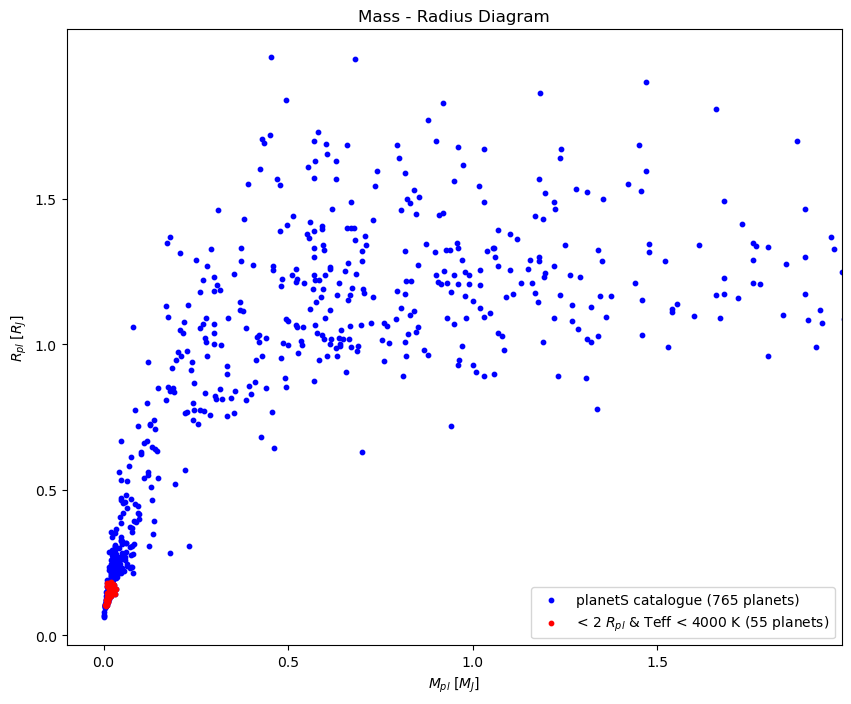

<Figure size 640x480 with 0 Axes>

In [28]:
plt.figure(figsize=(10,8))
plt.title('Mass - Radius Diagram')
plt.scatter(mass_all,radius_all,color='b', s=10,label='planetS catalogue (765 planets)')
plt.scatter(mass,radius,color='r', s=10,label='< 2 $R_{pl}$ & Teff < 4000 K (55 planets)')
plt.yticks(np.arange(0, 2.0, 0.5))
plt.xticks(np.arange(0, 2, 0.5))
plt.xlabel(r'$M_{pl} \; [M_{J}]$')
plt.ylabel(r'$R_{pl} \; [R_{J}]$')
plt.xlim(-0.1,2)
plt.legend()
plt.show()
plt.savefig('mass_radius_diagram.pdf', format='pdf')

In [29]:
#radius under 2 Re

radius_earth_all = radius_all * 10.973 #radius J in radius earth

under_two_mask = radius_earth_all < 2
under_two = radius_earth_all[under_two_mask]

under_two_mass = (big_planet_list_numbers['planet_mass'][under_two_mask]) * 317.83 #mass to plot

#print(len(radius_earth))
print("how many have radius < 2:", len(under_two))
#print(len(under_two_mass))
#print(under_two_mass)

how many have radius < 2: 92


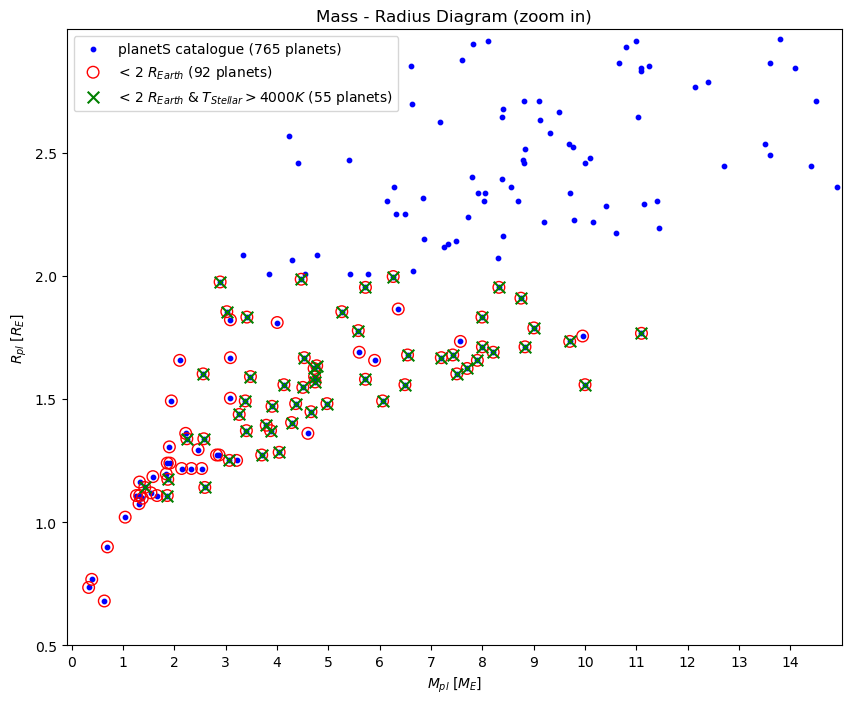

In [30]:
plt.figure(figsize=(10,8))
plt.title('Mass - Radius Diagram (zoom in)')

plt.scatter(mass_all * 317.83 ,radius_all *10.973,color='blue', s=10,label='planetS catalogue (765 planets)')
plt.scatter(under_two_mass, under_two, facecolors='none', edgecolors='r',s=70,label='< 2 $R_{Earth}$ (92 planets)')
plt.scatter(mass * 317.83,radius * 10.973,color='green', s=70, marker ='x',label='< 2 $R_{Earth} \; & \; T_{Stellar} > 4000 K$ (55 planets)')

plt.yticks(np.arange(0, 3, 0.5))
plt.xticks(np.arange(0, 15, 1))
plt.xlabel(r'$M_{pl} \; [M_{E}]$')
plt.ylabel(r'$R_{pl} \; [R_{E}]$')
plt.ylim(0.5,3)
plt.xlim(-0.1,15)
plt.legend()
plt.savefig('/Users/kasperer/Desktop/Thesis/mass_radius_diagram_zoom.pdf', format='pdf')
plt.show()

In [31]:
#stellar plots

In [32]:
star_count = big_planet_list['gaia_dr3_id'].value_counts()[big_planet_list['gaia_dr3_id'].value_counts() == 1].count()
print("STAR COUNT FOR 765 PLANETS:",star_count)

star_count_1 = planet_list['gaia_dr3_id'].value_counts()[planet_list['gaia_dr3_id'].value_counts() == 1].count()
print("STAR COUNT FOR 55 PLANETS:", star_count_1)

STAR COUNT FOR 765 PLANETS: 645
STAR COUNT FOR 55 PLANETS: 46


In [33]:
nan = stellar_surface_g_all.isna().sum()

print('starting list: 645 stars')
print("how many are nan in log g:", nan)
print("how many are left from the 645 individual stars:", 645 - nan)


nan2 = upper_teff_g.isna().sum()

print('1 filter list: (teff): 593')
print("how many are nan in log g in teff cut list:",nan2)
print("how many are left from the 593 individual stars:",593 - nan2)


nan1 = stellar_surface_g.isna().sum()
print('2 filter list: 46 stars')
print("how many are nan in log g in small list:",nan1)
print("how many are left from the 50 individual stars:",46 - nan1)


nan3 = stellar_surface_g_spectra.isna().sum()
print('spectra in ESPRESSO: 27 stars')
print("how many are nan in log g in small list:",nan3)
print("how many are left from the 50 individual stars:",27- nan3)

starting list: 645 stars
how many are nan in log g: 164
how many are left from the 645 individual stars: 481


NameError: name 'upper_teff_g' is not defined

In [111]:
upper_teff_mask = teff_all > 4000
upper_teff = teff_all[upper_teff_mask]
upper_teff_g = (big_planet_list_numbers['stellar_surface_gravity'][upper_teff_mask])

upper_teff_metalicity = (big_planet_list_numbers['stellar_metallicity'][upper_teff_mask])

upper_teff_id = (big_planet_list_numbers['gaia_dr3_id'][upper_teff_mask])

log_teff = np.log(teff_all) 

In [35]:
type(upper_teff_id)

single_occurrence_count = upper_teff_id.value_counts()[upper_teff_id.value_counts() == 1].count()
print(single_occurrence_count)

593


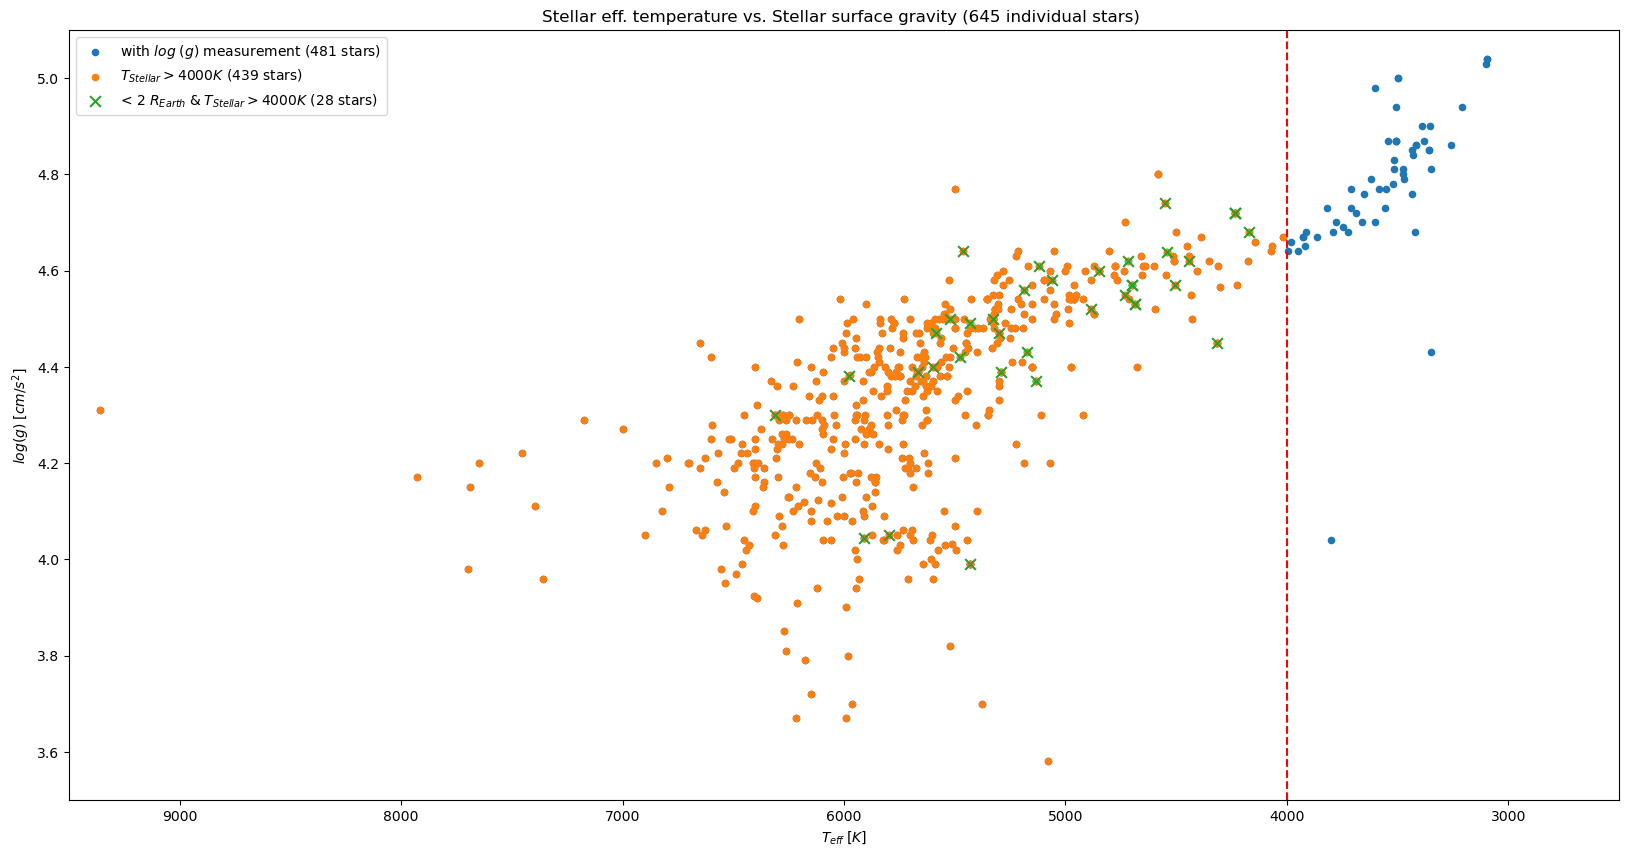

In [301]:
plt.figure(figsize=(20,10))
plt.title('Stellar eff. temperature vs. Stellar surface gravity (645 individual stars) ')
plt.scatter(teff_all, stellar_surface_g_all, s=20, label='with $log\; (g)$ measurement (511 stars)')
#plt.scatter(under_teff, under_teff_g, facecolors='none', edgecolors='r',s=80, label='$T_{Stellar} < 4000 K$ (690stars)')
plt.scatter(upper_teff,upper_teff_g,s=20,label='$T_{Stellar} > 4000 K$ (439 stars)')
plt.scatter(teff,stellar_surface_g,s=60, marker ='x',label='< 2 $R_{Earth} \; & \; T_{Stellar} > 4000 K$ (28 stars)')
plt.ylabel(r'$log(g) \; [cm / s^{2}]$')
plt.xlabel(r'$T_{eff} \; [K]$')
plt.xticks(np.arange(2000, 10000.0, 1000))
plt.ylim(3.5,5.1)
plt.xlim(2500,9500)
plt.gca().invert_xaxis() 
plt.axvline(4000,linestyle='--',color='r')
plt.legend()
plt.savefig('/Users/kasperer/Desktop/Thesis/stellar_teff_logg.pdf', format='pdf')
plt.show()

In [37]:
#3.List

In [38]:
#crossfit the planet_list with the ESPRESSO spectra

In [39]:
#FIRST: make a table only with GAIA DR3 ID to put into the ESO Archive

In [40]:
columns = ['gaia_dr3_id'] 
dr3 = planet_list[columns]
print(dr3)

             gaia_dr3_id
3     704967037090946688
23   3107267177757848576
26   2582617711154563968
28   6259263137059042048
43   2643842302456085888
45   2643842302456085888
46   2643842302456085888
163  3583630934082556416
164  5902750168276592256
167  6258810550587404672
171  5068777809824976256
180    30398648945512960
183  6407428994690988928
184  2009481748875806976
185  2009481748875806976
188  4674216245427964416
189  4674216245427964416
194  2554032474712538880
205   606477252238780160
215  2993561629444856960
218    53006669599267328
221  3580920878437938688
229  2643952940813536768
238  2556231154370582400
248  2597119620985658496
256  3409148746676599168
263  6237129658760381056
285  2132155017099178624
287  2086625752425381632
292  2105318412166111232
293  2105318412166111232
303  2081875484241210240
307  2102548708017562112
309  2099606483621385216
310  2135019107451751168
316  2129931456691176576
333  2078373642776670080
348  2102316985943863424
351  2102119176929154304


In [41]:
#add GAIA DR3 to every row

In [42]:
def prepend_gaia(entry):
    return f"GAIA DR3 {entry}"

dr3_modified = dr3.applymap(prepend_gaia)

output_file = 'dr3.txt'
with open(output_file, 'w') as f:
    for index, row in dr3_modified.iterrows():
        f.write('\t'.join(row) + '\n')

print(f"Data written to {output_file}")

Data written to dr3.txt


In [43]:
#put into ESPRESSO data set 

In [44]:
#--> spectra.txt with info on which spectras exist (BUT JUST THE COPIED TEXT)

In [45]:
import re

In [46]:
#read only GAIA DR3 ID and Number of spectra out of the sentences

In [47]:
input_file = '/Users/kasperer/Desktop/Thesis/spectra.txt'   
output_file = '/Users/kasperer/Desktop/Thesis/spectra_clear.txt' 

pattern = r"(GAIA DR3 \d+).*?(\d+) records"


extracted_data = []

with open(input_file, 'r') as f:
    for line in f:
        match = re.search(pattern, line)
        if match:
            gaia_info = match.group(1)  # GAIA DR3 info
            spectra_count = match.group(2)  # Number of records
            extracted_data.append(f"{gaia_info} {spectra_count}")

with open(output_file, 'w') as f:
    for entry in extracted_data:
        f.write(entry + '\n')

print(f"Data extracted and written to {output_file}")

Data extracted and written to /Users/kasperer/Desktop/Thesis/spectra_clear.txt


In [48]:
#---> spectra_clear with two columns GAIA DR3 INFO and Number of spectra in text file

In [49]:
spectra_records = {}

spectra_clear = '/Users/kasperer/Desktop/Thesis/spectra_clear.txt'

with open(spectra_clear, 'r') as f:
    for line in f:
        parts = line.split() #split it
        if len(parts) >= 3:
            gaia_id = ' '.join(parts[2:3])  #1. column: ignore "GAIA DR3"
            spectra_count = int(parts[3])  #2. column: number for spectra
            spectra_records[gaia_id] = spectra_count 

In [50]:
#match GAIA DR3 column from planet list with GAIA DR3 from spectra_clear

In [51]:
spectras = list(spectra_records.items())
spectra_list = pd.DataFrame(spectras, columns=['gaia_dr3_id', 'Number of Spectra'])

In [52]:
planets_spectra = pd.merge(planet_list, spectra_list, on='gaia_dr3_id', how='inner')

In [53]:
#planets_spectra = still includes all planets even if there is no spectra
#planets_with_spectra = shows only planets that have a host star with a spectra in ESPRESSO

In [54]:
planets_with_spectra = planets_spectra[planets_spectra['Number of Spectra'] != 0]

print(planets_with_spectra)

         planet_name      period  planet_mass  planet_radius  \
0           55 Cnc e   0.7365474      0.02514          0.167   
1          CoRoT-7 b      0.8535      0.01905          0.136   
2   EPIC 220674823 b    0.571292      0.02583          0.154   
3   EPIC 249893012 b      3.5951      0.02753          0.174   
4          GJ 9827 b    1.208974      0.01347          0.128   
5          GJ 9827 c    3.648103      0.00585          0.101   
6          GJ 9827 d    6.201812      0.00950          0.169   
7           K2-229 b    0.584249      0.00815          0.104   
8        HD 136352 b    11.57797      0.01485          0.148   
9        HD 137496 b     1.62116      0.01271          0.117   
10        HD 15337 b     4.75642      0.02265          0.152   
11        HD 20329 b    0.926118      0.02335          0.153   
12       HD 213885 b    1.008035      0.02778          0.156   
15        HD 23472 b   17.667087      0.02618          0.178   
16        HD 23472 c    29.79749      0.

In [55]:
print(len(planets_with_spectra)) #NUMBER OF PLANETS

32


In [56]:
path = '/Users/kasperer/Desktop/Thesis/planets_with_hoststar_spectra'
planets_with_spectra.to_csv(path, index=False)

PLOTS WITH SPECTRA SHOWN

In [182]:
star_count_1 = planet_list['gaia_dr3_id'].nunique()
print("STAR COUNT FOR 55 planets:", star_count_1)

star_count_1 = planets_spectra_up['gaia_dr3_id'].nunique()
print("STAR COUNT FOR 26 planets:", star_count_1)



STAR COUNT FOR 55 planets: 50
STAR COUNT FOR 26 planets: 25


In [93]:
stellar_surface_g_spectra = planets_with_spectra['stellar_surface_gravity']
print(len(stellar_surface_g_spectra))

teff_spectra = planets_with_spectra['stellar_eff_temp']
print(len(teff_spectra))

teff_up = planets_spectra_up['stellar_eff_temp']
print(len(teff_up))

stellar_surface_g_up = planets_spectra_up['stellar_surface_gravity']
print(len(stellar_surface_g_up))

nan3 = stellar_surface_g_spectra.isna().sum()
print("not nan out of the 32 stars:",32 - nan3)

32
32
26
26
not nan out of the 32 stars: 24


In [59]:
stars_logg_all = big_planet_list[big_planet_list['stellar_surface_gravity'].notna()]
star_count_1 = stars_logg_all['gaia_dr3_id'].nunique()
print("STAR COUNT FOR 765 PLANETS WITH LOG G MEARUSEMENT:", star_count_1)

stars_upper_teff_g = big_planet_list[upper_teff_mask & big_planet_list['stellar_surface_gravity'].notna()]
star_count_2 = stars_upper_teff_g['gaia_dr3_id'].nunique()
print("STAR COUNT FOR > 4000 K WITH LOG G MEARUSEMENT:", star_count_2)

stars_logg = planet_list[planet_list['stellar_surface_gravity'].notna()]
star_count_3 = stars_logg['gaia_dr3_id'].nunique()
print("STAR COUNT FOR 55 PLANETS WITH LOG G MEARUSEMENT:", star_count_3)

stars_logg_spectra = planets_with_spectra[planets_with_spectra['stellar_surface_gravity'].notna()]
star_count_4 = stars_logg_spectra['gaia_dr3_id'].nunique()
print("STAR COUNT FOR 55 PLANETS WITH LOG G MEARUSEMENT AND STELLAR SPECTRA:", star_count_4)
print(len(stars_logg_spectra))

star_count_5 = planets_with_spectra['gaia_dr3_id'].nunique()
print("STAR COUNT FOR 55 PLANETS WITH LOG G MEARUSEMENT AND STELLAR SPECTRA:", star_count_5)

STAR COUNT FOR 765 PLANETS WITH LOG G MEARUSEMENT: 550
STAR COUNT FOR > 4000 K WITH LOG G MEARUSEMENT: 495
STAR COUNT FOR 55 PLANETS WITH LOG G MEARUSEMENT: 33
STAR COUNT FOR 55 PLANETS WITH LOG G MEARUSEMENT AND STELLAR SPECTRA: 21
24
STAR COUNT FOR 55 PLANETS WITH LOG G MEARUSEMENT AND STELLAR SPECTRA: 29


In [98]:
len(planets_with_spectra)



stars_logg_11 = planets_spectra_up[planets_spectra_up['stellar_surface_gravity'].notna()]
star_count_6 = stars_logg_11['gaia_dr3_id'].nunique()
#star_count_6 = planets_spectra_up['gaia_dr3_id'].nunique()
print(star_count_6)



17


In [61]:
print((stellar_surface_g_all.notna() == True).sum())
print((upper_teff_g.notna() == True).sum())
print((stellar_surface_g.notna() == True).sum())
print((stellar_surface_g_spectra.notna() == True).sum())

601
536
37
24


In [62]:
#print(stars_logg_spectra)
star_count_4 = stars_logg_spectra['gaia_dr3_id'].nunique()

print("COUNT OF UNIQUE GAIA DR3 IDs:", star_count_4)

star_count_7 = 

         planet_name      period  planet_mass  planet_radius  \
0           55 Cnc e   0.7365474      0.02514          0.167   
3   EPIC 249893012 b      3.5951      0.02753          0.174   
4          GJ 9827 b    1.208974      0.01347          0.128   
5          GJ 9827 c    3.648103      0.00585          0.101   
6          GJ 9827 d    6.201812      0.00950          0.169   
7           K2-229 b    0.584249      0.00815          0.104   
8        HD 136352 b    11.57797      0.01485          0.148   
9        HD 137496 b     1.62116      0.01271          0.117   
10        HD 15337 b     4.75642      0.02265          0.152   
11        HD 20329 b    0.926118      0.02335          0.153   
12       HD 213885 b    1.008035      0.02778          0.156   
15        HD 23472 b   17.667087      0.02618          0.178   
16        HD 23472 c    29.79749      0.01073          0.167   
17         HD 3167 b  0.95965428      0.01488          0.145   
19       HIP 29442 c     3.53796      0.

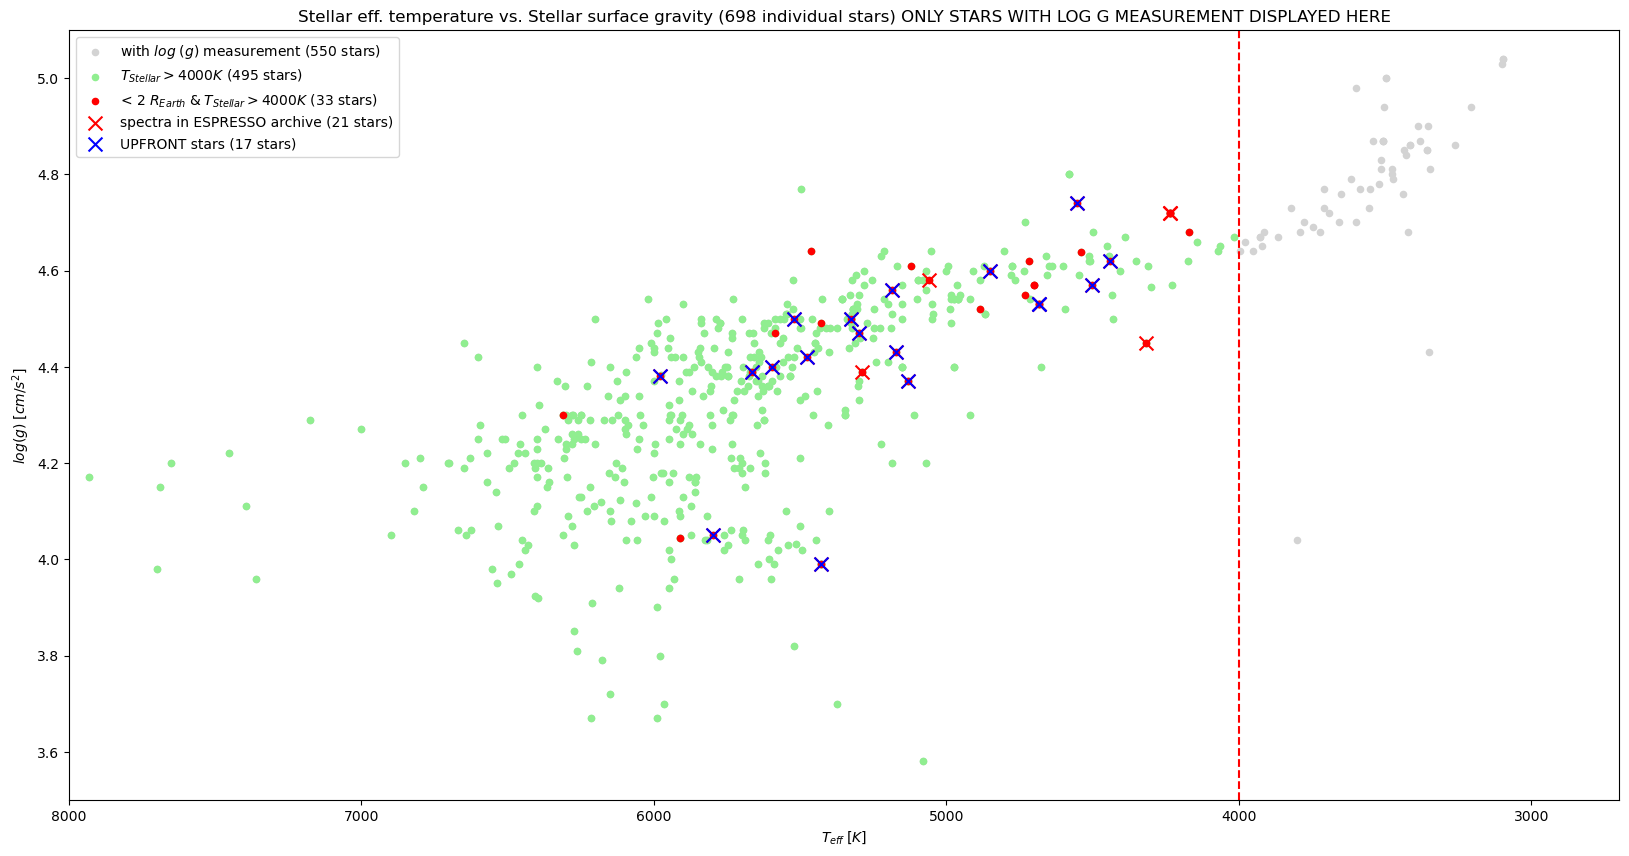

In [109]:
plt.figure(figsize=(20,10))
plt.title('Stellar eff. temperature vs. Stellar surface gravity (698 individual stars) ONLY STARS WITH LOG G MEASUREMENT DISPLAYED HERE')
plt.scatter(teff_all, stellar_surface_g_all, s=20, label='with $log\; (g)$ measurement (550 stars)',color='lightgrey')
#plt.scatter(under_teff, under_teff_g, facecolors='none', edgecolors='r',s=80, label='$T_{Stellar} < 4000 K$ (690stars)')
plt.scatter(upper_teff,upper_teff_g,s=20,label='$T_{Stellar} > 4000 K$ (495 stars)',color='lightgreen')
plt.scatter(teff,stellar_surface_g,s=20, label='< 2 $R_{Earth} \; & \; T_{Stellar} > 4000 K$ (33 stars)',color='r')
#plt.scatter(teff_spectra, stellar_surface_g_spectra,facecolors='none', edgecolors='r',s=90, label='spectra in ESPRESSO archive (21 stars)')
plt.scatter(teff_spectra, stellar_surface_g_spectra,marker='x',s=100, color='r',label='spectra in ESPRESSO archive (21 stars)')
plt.scatter(teff_up,stellar_surface_g_up, marker='x', s=100, color='blue',label='UPFRONT stars (17 stars)')
plt.ylabel(r'$log(g) \; [cm / s^{2}]$')
plt.xlabel(r'$T_{eff} \; [K]$')
plt.xticks(np.arange(2000, 10000.0, 1000))
plt.ylim(3.5,5.1)
plt.xlim(2700,8000)
plt.gca().invert_xaxis() 
plt.axvline(4000,linestyle='--',color='r')
plt.legend()
plt.savefig('/Users/kasperer/Desktop/Thesis/stars.pdf', format='pdf')
plt.show()

In [64]:
#stellar metallcity plot

In [103]:
stellar_metallicity_spectra = planets_with_spectra['stellar_metallicity']
stellar_metallicity_up = planets_spectra_up['stellar_metallicity']

In [105]:
stars_all = big_planet_list['gaia_dr3_id'].nunique()
print("STAR COUNT:", stars_all)

stars_metal_all = big_planet_list[big_planet_list['stellar_metallicity'].notna()]
star_count_1 = stars_metal_all['gaia_dr3_id'].nunique()
print("STAR COUNT WITH FE / H MEARUSEMENT:", star_count_1)

stars_metal = planet_list[planet_list['stellar_metallicity'].notna()]
star_count_3 = stars_metal['gaia_dr3_id'].nunique()
print("STAR COUNT WITH FE / H AND 2 FILTERS:", star_count_3)

stars_metal_spectra = planets_with_spectra[planets_with_spectra['stellar_metallicity'].notna()]
star_count_4 = stars_metal_spectra['gaia_dr3_id'].nunique()
print("STAR COUNT WITH FE / H AND 2 FILTERS AND SPECTRA:", star_count_4)

stars_metal_spectra_up = planets_spectra_up[planets_spectra_up['stellar_metallicity'].notna()]
star_count_5 = stars_metal_spectra_up['gaia_dr3_id'].nunique()
print("STAR COUNT WITH FE / H AND 2 FILTERS AND SPECTRA IN UPFRONT:", star_count_5)


STAR COUNT: 698
STAR COUNT WITH FE / H MEARUSEMENT: 650
STAR COUNT WITH FE / H AND 2 FILTERS: 45
STAR COUNT WITH FE / H AND 2 FILTERS AND SPECTRA: 27
STAR COUNT WITH FE / H AND 2 FILTERS AND SPECTRA IN UPFRONT: 23


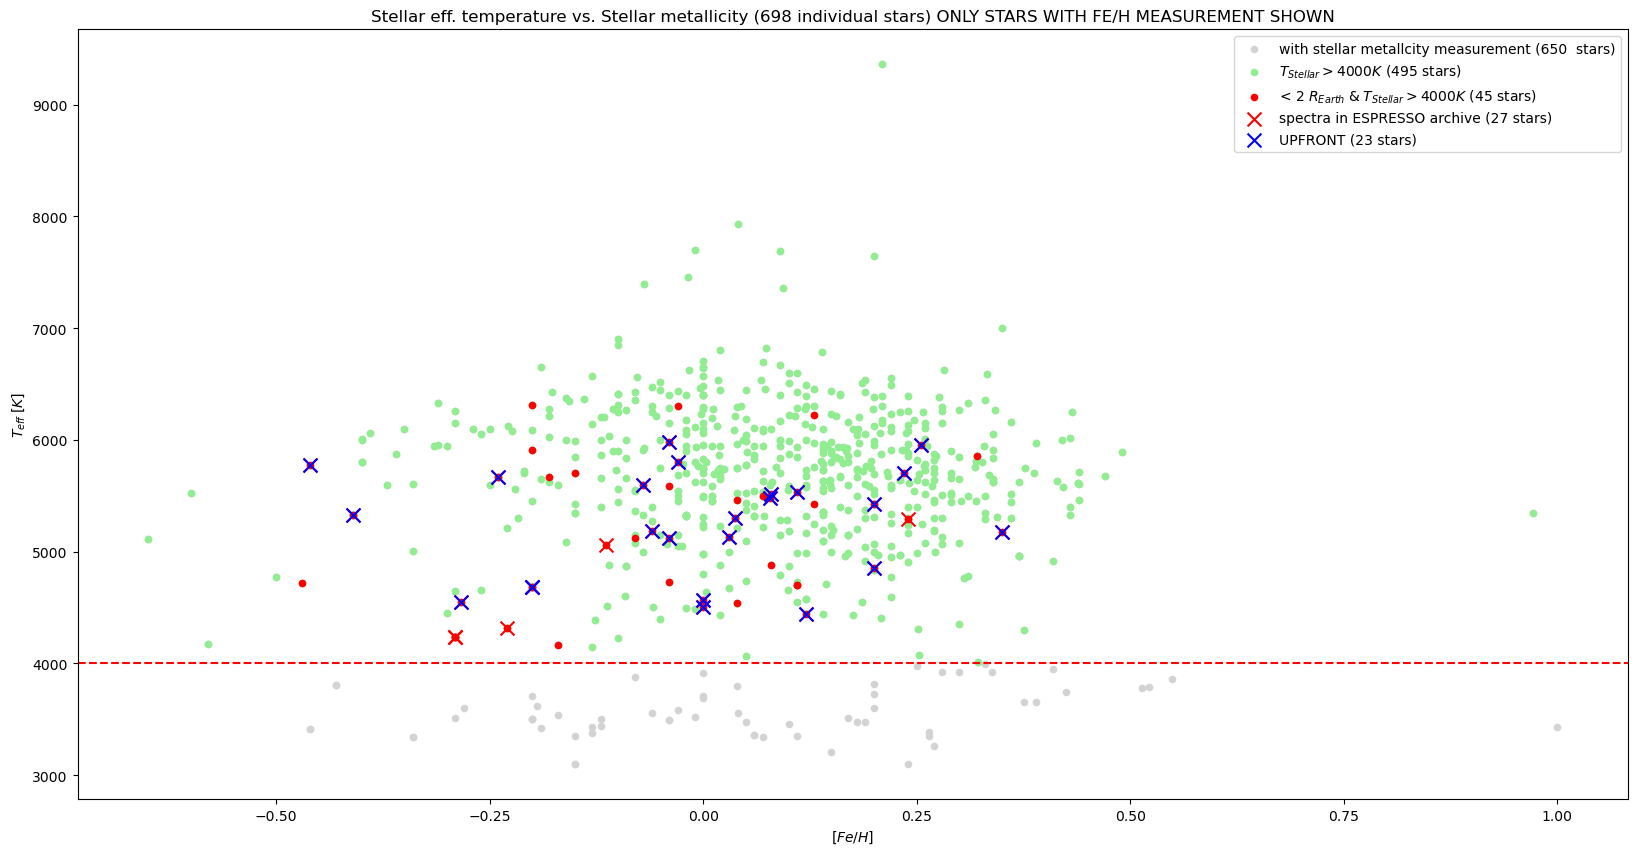

In [114]:
plt.figure(figsize=(20,10))
plt.title('Stellar eff. temperature vs. Stellar metallicity (698 individual stars) ONLY STARS WITH FE/H MEASUREMENT SHOWN')
plt.scatter(stellar_metallicity_all, teff_all,  s=20, label='with stellar metallcity measurement (650  stars)',color='lightgrey')
plt.scatter(upper_teff_metalicity,upper_teff,s=20,label='$T_{Stellar} > 4000 K$ (495 stars)',color='lightgreen')
plt.scatter(stellar_metallicity, teff, s=20, label='< 2 $R_{Earth} \; & \; T_{Stellar} > 4000 K$ (45 stars)',color='r')
plt.scatter(stellar_metallicity_spectra, teff_spectra, marker='x',s=100, color='r',label='spectra in ESPRESSO archive (27 stars)')
plt.scatter(stellar_metallicity_up, teff_up, marker='x',s=100, color='b',label='UPFRONT (23 stars)')

plt.xlabel(r'$[Fe / H]$')
plt.ylabel(r'$T_{eff} \; [K]$')
#plt.ylim(3000,8000)
plt.axhline(4000,linestyle='--',color='r')
plt.legend()
#plt.savefig('/Users/kasperer/Desktop/Thesis/stars_metallcity.pdf', format='pdf')
plt.show()

In [68]:
#check how many stars
#planets that fulfill the filter but are in the same system

In [69]:
star_count_5 = planets_with_spectra['gaia_dr3_id'].nunique()
print("STAR COUNT FOR 32 PLANETS WITH STELLAR SPECTRA:", star_count_5)

STAR COUNT FOR 32 PLANETS WITH STELLAR SPECTRA: 29


In [70]:
sorted_by_stars = planets_with_spectra.sort_values(by='gaia_dr3_id')

sorted_by_stars['STAR'] = sorted_by_stars['gaia_dr3_id'].where(sorted_by_stars['gaia_dr3_id'].ne(sorted_by_stars['gaia_dr3_id'].shift()), 'SAME STAR AS ABOVE')

print(sorted_by_stars)

         planet_name      period  planet_mass  planet_radius  \
43         TOI-178 c     3.23845      0.01501          0.149   
45         TOI-238 b   1.2730991      0.01070          0.125   
17         HD 3167 b  0.95965428      0.01488          0.145   
23          K2-216 b      2.1748      0.02517          0.156   
2   EPIC 220674823 b    0.571292      0.02583          0.154   
24          K2-265 b    2.369172      0.02058          0.153   
52         WASP-47 e     0.78961      0.02832          0.163   
4          GJ 9827 b    1.208974      0.01347          0.128   
5          GJ 9827 c    3.648103      0.00585          0.101   
6          GJ 9827 d    6.201812      0.00950          0.169   
22          K2-141 b   0.2803244      0.01564          0.135   
46         TOI-431 b    0.490047      0.00966          0.114   
19       HIP 29442 c     3.53796      0.01416          0.141   
11        HD 20329 b    0.926118      0.02335          0.153   
1          CoRoT-7 b      0.8535      0.

In [71]:
path = '/Users/kasperer/Desktop/Thesis/planets_spectra_sortedbystars'
sorted_by_stars.to_csv(path, index=False)

In [72]:
#32 planets
#29 stars

In [73]:
#check with Teffs what has Teff from what source -> 2 stars only have Teff in NASA not GAIA DR3
#name lists so there is no confusion 
#upload it online

In [74]:
#4.List

In [75]:
#crossmatch it with 29 stars from UPFRONT

In [76]:
from astropy.io import fits
import numpy as np

In [77]:
#GAIA DR3 ID FOR 29 STARS FROM BARBARA
gaia_ids = pd.read_csv('/Users/kasperer/Desktop/Thesis/gaia_dr3_id_29_stars.txt', header=None, names=['gaia_dr3_id'])
print(gaia_ids)

            gaia_dr3_id
0    704967037090946688
1   6230733559097425152
2   2908664557091200768
3   5509620021956148736
4   5287888182069257344
5   3107267177757848576
6   5902750168276592256
7   6258810550587404672
8     30398648945512960
9   6407428994690988928
10  4674216245427964416
11  3409148746676599168
12  2554032474712538880
13   606477252238780160
14   729899906357408768
15  2582617711154563968
16    53006669599267328
17  3580920878437938688
18  2643952940813536768
19  3620501712193719296
20  2556231154370582400
21  3583630934082556416
22  2597119620985658496
23  6259263137059042048
24  3811989156889528320
25  6237129658760381056
26  5068777809824976256
27  3850421005290172416
28  2613413008919918976


In [84]:
#converte to str. type
planets_with_spectra['gaia_dr3_id'] = planets_with_spectra['gaia_dr3_id'].astype(str)
gaia_ids['gaia_dr3_id'] = gaia_ids['gaia_dr3_id'].astype(str)

#CROSSMATCH
planets_spectra_up = pd.merge(planets_with_spectra, gaia_ids, on='gaia_dr3_id', how='inner')

print(planets_spectra_up)

         planet_name      period  planet_mass  planet_radius  \
0           55 Cnc e   0.7365474      0.02514          0.167   
1          CoRoT-7 b      0.8535      0.01905          0.136   
2   EPIC 220674823 b    0.571292      0.02583          0.154   
3   EPIC 249893012 b      3.5951      0.02753          0.174   
4           K2-229 b    0.584249      0.00815          0.104   
5        HD 136352 b    11.57797      0.01485          0.148   
6        HD 137496 b     1.62116      0.01271          0.117   
7         HD 15337 b     4.75642      0.02265          0.152   
8         HD 20329 b    0.926118      0.02335          0.153   
9        HD 213885 b    1.008035      0.02778          0.156   
10        HD 23472 b   17.667087      0.02618          0.178   
11        HD 23472 c    29.79749      0.01073          0.167   
12         HD 3167 b  0.95965428      0.01488          0.145   
13        HD 80653 b    0.719573      0.01800          0.144   
14          K2-111 b      5.3518      0.

/var/folders/2x/jt01c38n3ybgl1tttphvrwhr0000gn/T/ipykernel_14879/1058233304.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  planets_with_spectra['gaia_dr3_id'] = planets_with_spectra['gaia_dr3_id'].astype(str)


In [86]:
print(len(planets_spectra_up))
print(len(planets_with_spectra))

path = '/Users/kasperer/Desktop/Thesis/planets_with_spectra_up'
planets_spectra_up.to_csv(path, index=False)

26
32


In [87]:
star_count_5 = planets_with_spectra['gaia_dr3_id'].nunique()
print("STAR COUNT FOR 32 PLANETS WITH STELLAR SPECTRA IN ESO ARCHIVE:", star_count_5)

star_count_6 = planets_spectra_up['gaia_dr3_id'].nunique()
print("STAR COUNT FOR 26 PLANETS WITH STELLAR SPECTRA IN UPFRONT:", star_count_6)

STAR COUNT FOR 32 PLANETS WITH STELLAR SPECTRA IN ESO ARCHIVE: 29
STAR COUNT FOR 26 PLANETS WITH STELLAR SPECTRA IN UPFRONT: 25


In [88]:
diff2 = pd.concat([planets_with_spectra, planets_spectra_up]).drop_duplicates(keep=False)

print(diff2)

    planet_name     period  planet_mass  planet_radius planet_mass_rel_err  \
4     GJ 9827 b   1.208974      0.01347          0.128  0.0794357832219747   
5     GJ 9827 c   3.648103      0.00585          0.101   0.204273504273504   
6     GJ 9827 d   6.201812      0.00950          0.169                0.19   
19  HIP 29442 c    3.53796      0.01416          0.141  0.0663841807909604   
43    TOI-178 c    3.23845      0.01501          0.149   0.128914057295136   
45    TOI-238 b  1.2730991      0.01070          0.125   0.135514018691589   

   planet_radius_rel_err  stellar_eff_temp          gaia_dr3_id  \
4              0.0546875            4236.0  2643842302456085888   
5     0.0495049504950495            4236.0  2643842302456085888   
6     0.0769230769230769            4236.0  2643842302456085888   
19    0.0673758865248227            5289.0  2993561629444856960   
43    0.0637583892617449            4316.0  2318295979126499200   
45                 0.064            5059.0  2405081

In [82]:
result = planets_with_spectra[planets_with_spectra['gaia_dr3_id'] == 2405081733281425280]
print(result)

Empty DataFrame
Columns: [planet_name, period, planet_mass, planet_radius, planet_mass_rel_err, planet_radius_rel_err, stellar_eff_temp, gaia_dr3_id, stellar_surface_gravity, stellar_metallicity, Number of Spectra]
Index: []


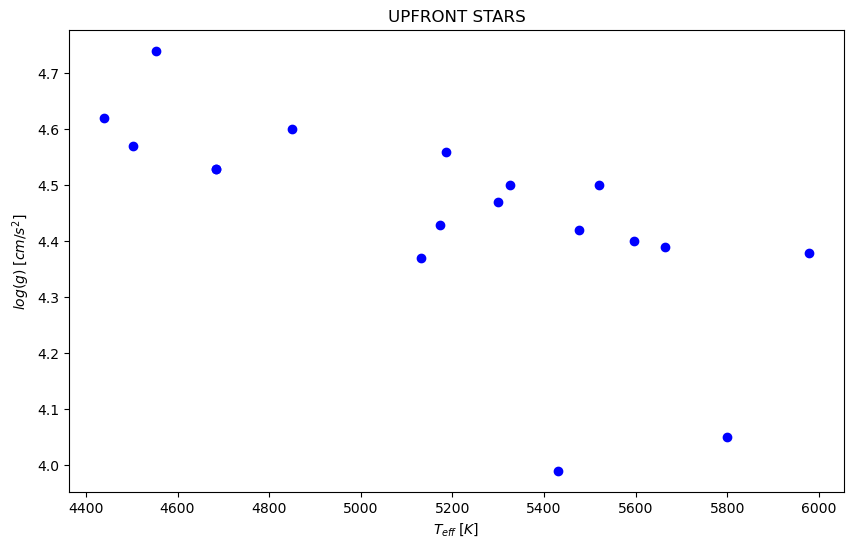

In [119]:
plt.figure(figsize=(10,6))
plt.title('UPFRONT STARS')
plt.scatter(teff_up,stellar_surface_g_up, color='blue',label='UPFRONT stars (17 stars)')
plt.ylabel(r'$log(g) \; [cm / s^{2}]$')
plt.xlabel(r'$T_{eff} \; [K]$')
plt.show()

In [139]:
mass_up = planets_spectra_up['planet_mass']
radius_up = planets_spectra_up['planet_radius']

len(mass_up)
len(mass_all)

765

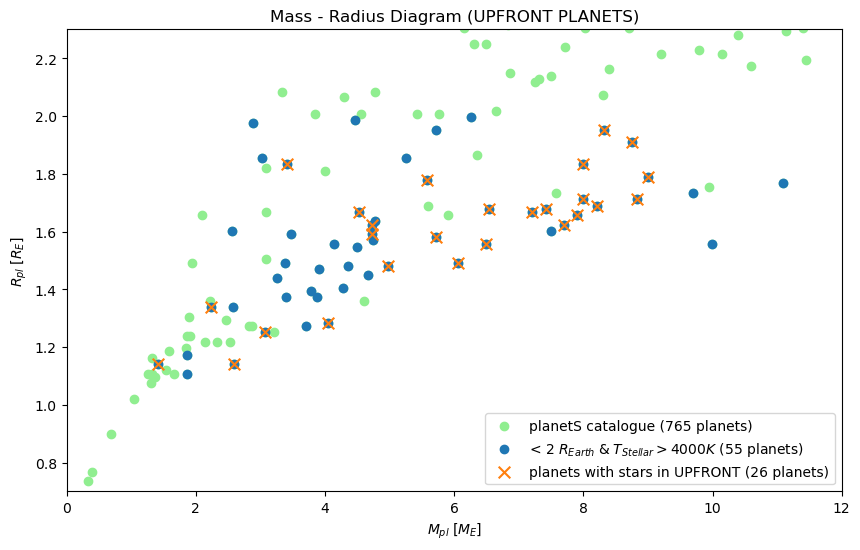

In [141]:
plt.figure(figsize=(10,6))
plt.title('Mass - Radius Diagram (UPFRONT PLANETS)')

plt.scatter(mass_all * 317.83,radius_all * 10.973,label='planetS catalogue (765 planets)',color='lightgreen')
plt.scatter(mass * 317.83,radius * 10.973,label='< 2 $R_{Earth} \; & \; T_{Stellar} > 4000 K$ (55 planets)')
plt.scatter(mass_up * 317.83,radius_up * 10.973,marker='x',s=70,label='planets with stars in UPFRONT (26 planets)')

plt.xlabel(r'$M_{pl} \; [M_{E}]$')
plt.ylabel(r'$R_{pl} \; [R_{E}]$')

plt.xlim(0,12)
plt.ylim(0.7,2.3)

plt.legend()

plt.show()

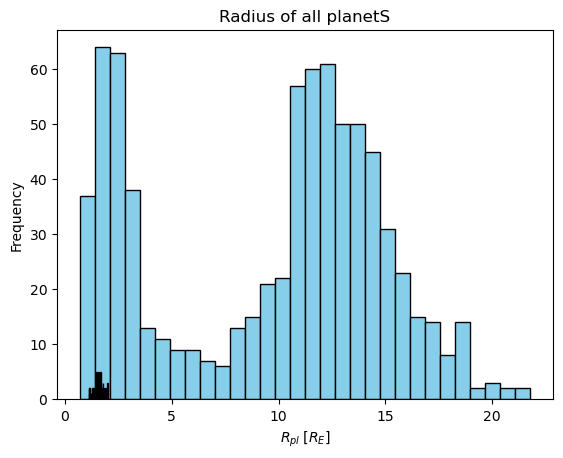

In [150]:
plt.hist(radius_all * 10.973, bins=30, color='skyblue', edgecolor='black')
plt.hist(radius * 10.973, bins=30, color='red', edgecolor='black')
plt.hist(radius_up * 10.973, bins=30, color='green', edgecolor='black')

plt.xlabel(r'$R_{pl} \; [R_{E}]$')
plt.ylabel('Frequency')
plt.title('Radius of all planetS')
 
plt.show()

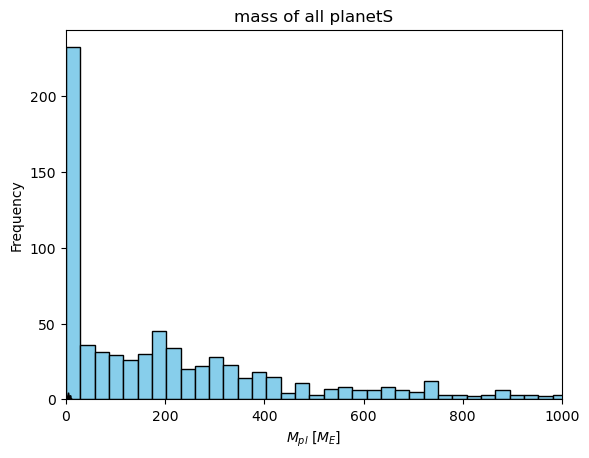

In [168]:
plt.hist(mass_all * 317.83, bins=300, color='skyblue', edgecolor='black')
plt.hist(mass * 317.83, bins=30, color='red', edgecolor='black')
plt.hist(mass_up * 317.83, bins=30, color='green', edgecolor='black')

plt.xlabel(r'$M_{pl} \; [M_{E}]$')
plt.ylabel('Frequency')
plt.title('mass of all planetS')
plt.xlim(0,1000)
 
plt.show()

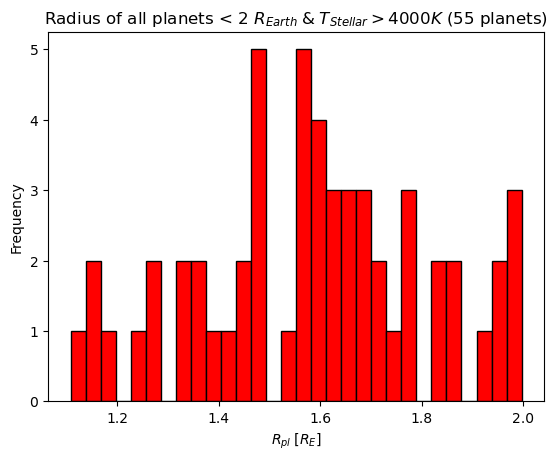

In [161]:
plt.hist(radius * 10.973, bins=30, color='red', edgecolor='black')
plt.xlabel(r'$R_{pl} \; [R_{E}]$')
plt.ylabel('Frequency')
plt.title('Radius of all planets < 2 $R_{Earth} \; & \; T_{Stellar} > 4000 K$ (55 planets)')
#plt.hist(radius_up * 10.973, bins=30, color='green', edgecolor='black')
 
plt.show()

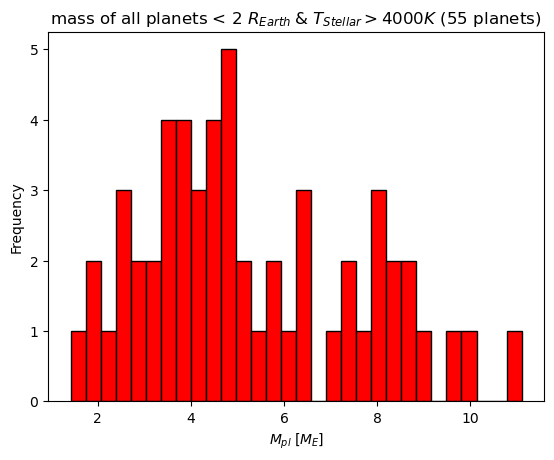

In [169]:
plt.hist(mass * 317.83, bins=30, color='red', edgecolor='black')

plt.xlabel(r'$M_{pl} \; [M_{E}]$')
plt.ylabel('Frequency')
plt.title('mass of all planets < 2 $R_{Earth} \; & \; T_{Stellar} > 4000 K$ (55 planets)')
 
plt.show()

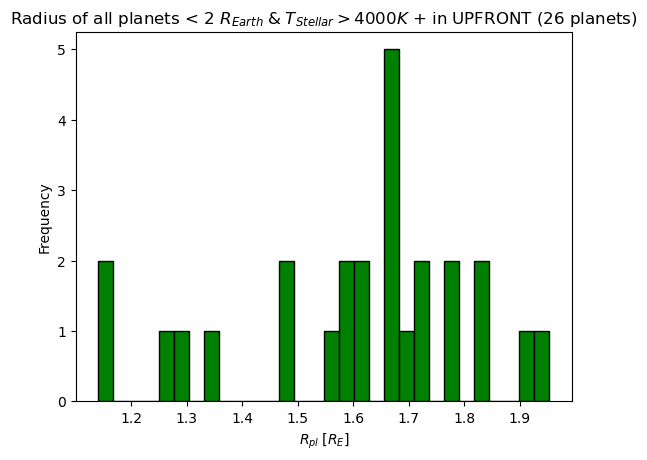

In [159]:
plt.hist(radius_up * 10.973, bins=30, color='green', edgecolor='black')
plt.xlabel(r'$R_{pl} \; [R_{E}]$')
plt.ylabel('Frequency')
plt.title('Radius of all planets < 2 $R_{Earth} \; & \; T_{Stellar} > 4000 K$ + in UPFRONT (26 planets)')
 
plt.show()

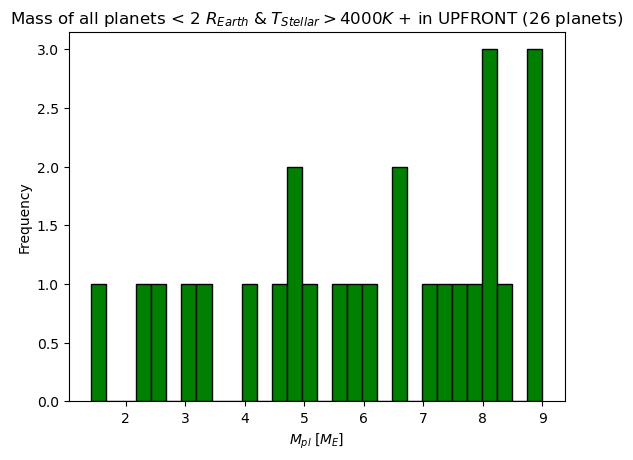

In [163]:
plt.hist(mass_up * 317.83, bins=30, color='green', edgecolor='black')
plt.xlabel(r'$M_{pl} \; [M_{E}]$')
plt.ylabel('Frequency')
plt.title('Mass of all planets < 2 $R_{Earth} \; & \; T_{Stellar} > 4000 K$ + in UPFRONT (26 planets)')
 
plt.show()

In [173]:
len(teff)

55

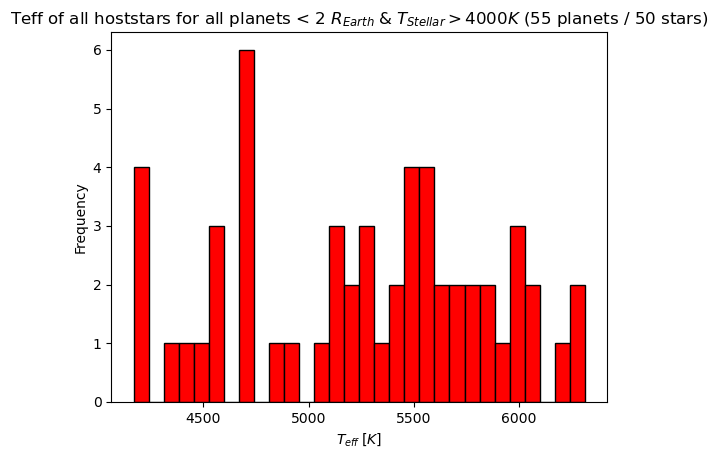

In [177]:
plt.hist(teff, bins=30, color='red', edgecolor='black')
plt.xlabel(r'$T_{eff} \; [K]$')
plt.ylabel('Frequency')
plt.title('Teff of all hoststars for all planets < 2 $R_{Earth} \; & \; T_{Stellar} > 4000 K$ (55 planets / 50 stars)')
plt.show()

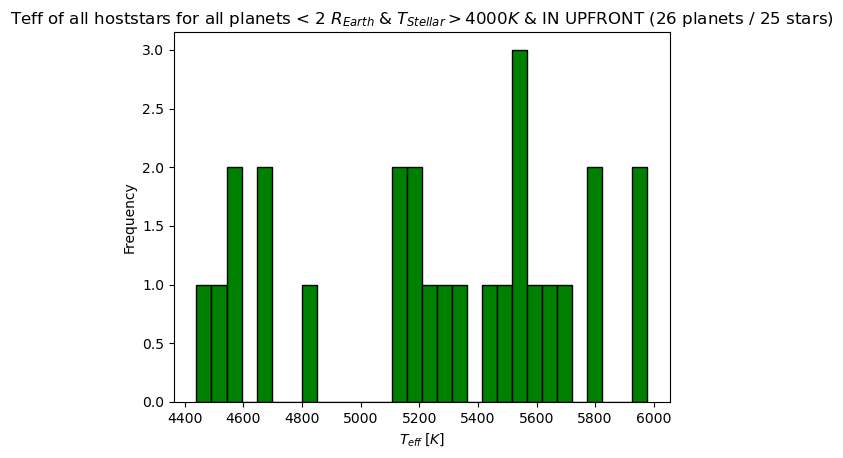

In [185]:
plt.hist(teff_up, bins=30, color='green', edgecolor='black')
plt.xlabel(r'$T_{eff} \; [K]$')
plt.ylabel('Frequency')
plt.title('Teff of all hoststars for all planets < 2 $R_{Earth} \; & \; T_{Stellar} > 4000 K$ & IN UPFRONT (26 planets / 25 stars)')
plt.show()